In [102]:
# Read in column name vector and table
library('readr')
cols <- read_csv('All_Data.csv', n_max=1)
coln <- names(cols)
tbl <- read_csv('All_Data.csv', col_names=F, skip=1)
# Drop first column of table and name columns
tbl <- tbl[,2:ncol(tbl)]
colnames(tbl) <- coln
head(tbl)

Parsed with column specification:
cols(
  year = col_integer(),
  site = col_integer(),
  season = col_character(),
  fakedate = col_integer(),
  C3_forb = col_date(format = ""),
  C3_grass = col_double(),
  C3_shrub_subshrub = col_integer(),
  C4_forb = col_double(),
  C4_grass = col_integer(),
  CAM = col_double(),
  `<NA>` = col_double(),
  season.precip = col_double(),
  season.temp = col_double(),
  minimum.temp = col_double(),
  maximum.temp = col_double(),
  Cricetid = col_double(),
  Heteromyid = col_double(),
  Scurid = col_double()
)
Warning message:
“2 parsing failures.
row # A tibble: 2 x 5 col     row   col   expected     actual           file expected   <int> <chr>      <chr>      <chr>          <chr> actual 1     1  <NA> 18 columns 19 columns 'All_Data.csv' file 2     1  <NA> 18 columns 19 columns 'All_Data.csv'
”Parsed with column specification:
cols(
  X1 = col_integer(),
  X2 = col_integer(),
  X3 = col_character(),
  X4 = col_integer(),
  X5 = col_date(format = ""),


year,site,season,fakedate,C3_forb,C3_grass,C3_shrub_subshrub,C4_forb,C4_grass,CAM,<NA>,season.precip,season.temp,minimum.temp,maximum.temp,Cricetid,Heteromyid,Scurid
1999,C,1,1999-04-01,0.310375,0.000000,7.128375,0.000000,2.206875,0.7125,1.577250,34.3,12.87680,-11.6,38.9,2.1666667,14.583333,0.33333333
1999,C,2,1999-10-01,0.751000,0.004375,6.264750,0.709500,1.773875,1.6125,1.272000,150.5,20.69675,-3.1,39.7,1.5000000,10.833333,0.66666667
1999,G,1,1999-04-01,0.074250,0.000000,0.863375,0.231875,13.149000,0.1375,2.972875,34.3,12.87680,-11.6,38.9,0.7500000,9.833333,0.75000000
1999,G,2,1999-10-01,0.205000,0.005625,0.863875,0.622875,15.907750,0.0000,3.258125,150.5,20.69675,-3.1,39.7,0.1666667,5.416667,0.91666667
2000,C,1,2000-04-01,0.482000,0.000000,8.352875,0.000000,1.229250,1.8125,2.867750,87.5,11.67984,-13.1,38.0,1.5833333,16.833333,0.50000000
2000,C,2,2000-10-01,0.319375,0.000000,9.576375,0.000500,1.214250,1.5625,1.676500,133.9,21.89024,1.5,47.2,1.5833333,19.250000,0.08333333


## Cross correlations

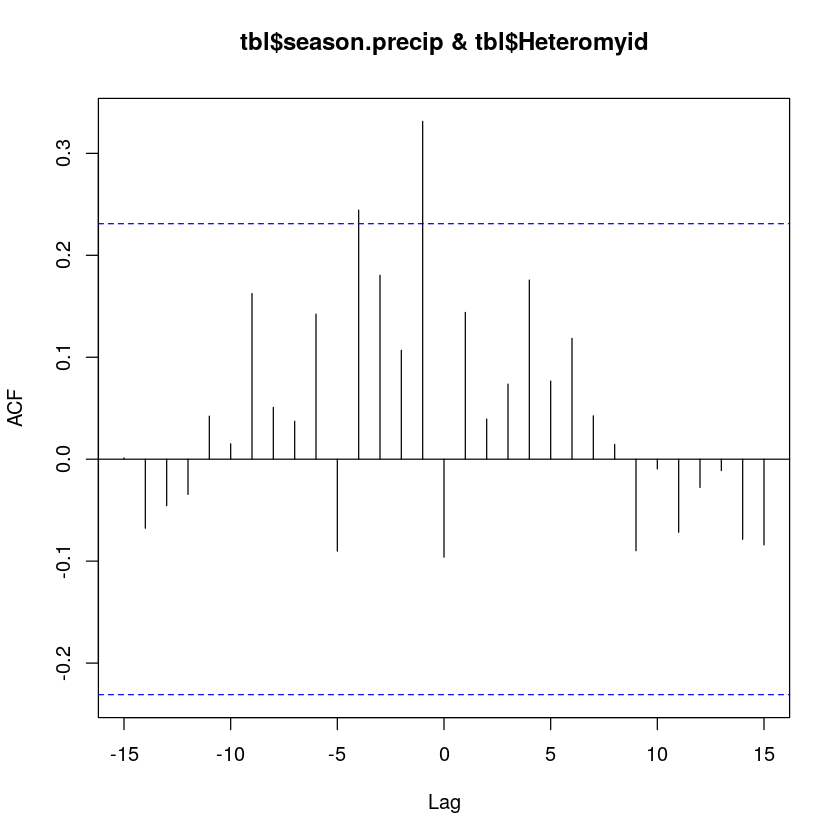

In [54]:
# Cross correlations between seasonal precip and Heteromyid abundance
ccf(tbl$season.precip, tbl$Heteromyid, na.action=na.pass)

# Significant peaks are those that pass the blue lines.
# The peak at -1 indicates that Heteromyid abundance is correlated to the prior season's precip,
# (precip leads Heteromyid abundance).
# So, it suggests you might want to do a regression with a lagged variable

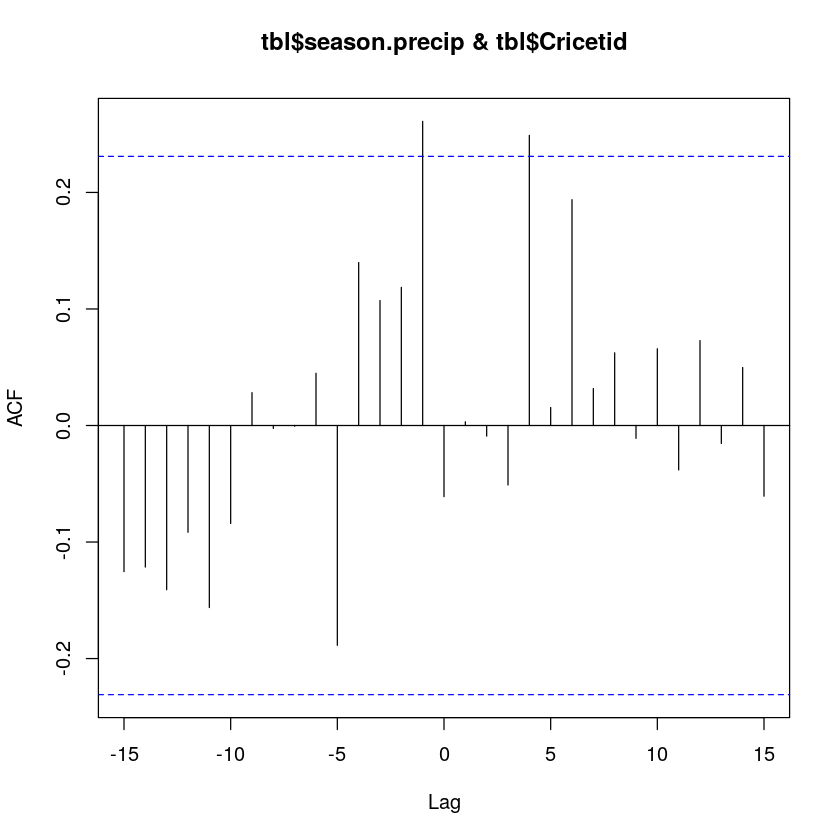

In [55]:
# Cross correlations between seasonal precip and Cricetid abundance
ccf(tbl$season.precip, tbl$Cricetid, na.action=na.pass)

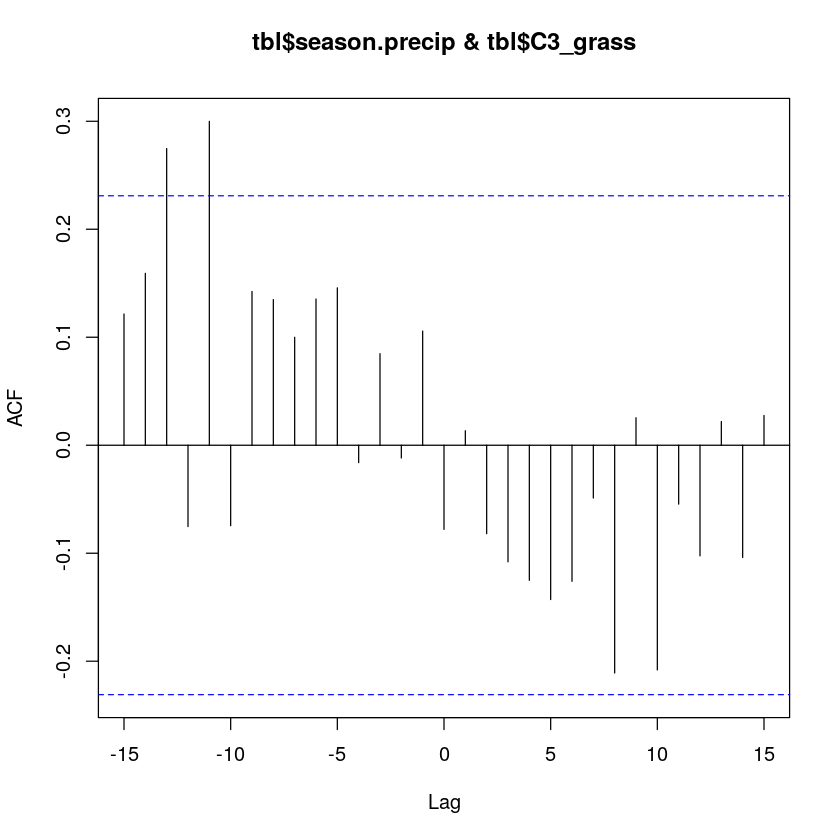

In [56]:
ccf(tbl$season.precip, tbl$C3_grass, na.action=na.pass)

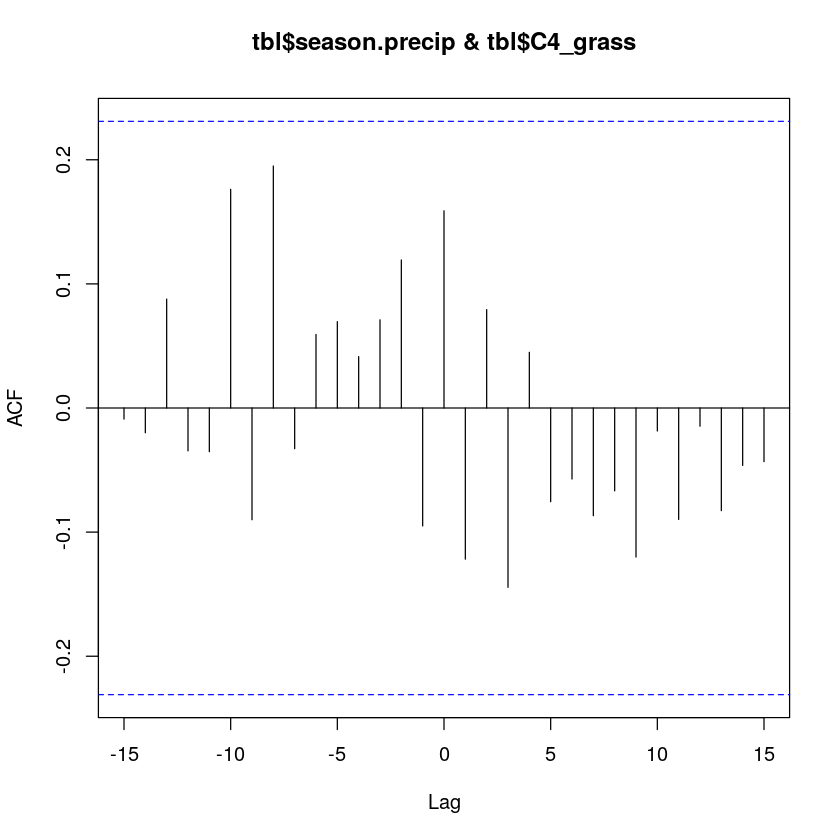

In [57]:
ccf(tbl$season.precip, tbl$C4_grass, na.action=na.pass)

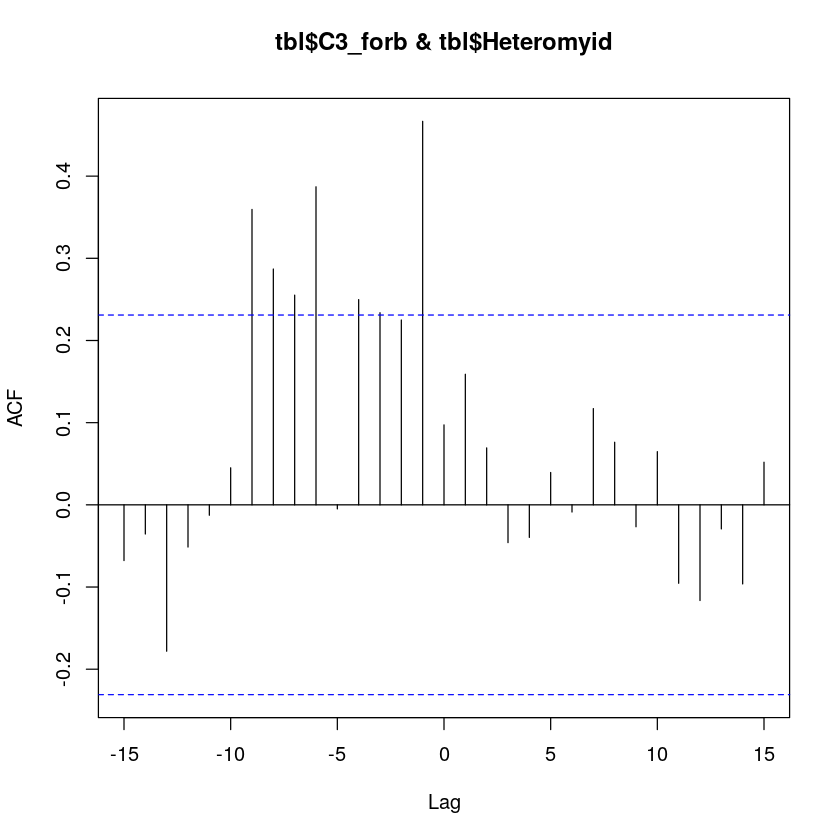

In [59]:
ccf(tbl$C3_forb, tbl$Heteromyid, na.action=na.pass)

## Linear models

In [104]:
# Lets make a simple and a multiple linear model and compare them:
# First H abundance vs seasonal precip
ph_lm1 <- lm(Heteromyid ~ season.precip, data=tbl)
summary(ph_lm1)
#The summary indicates that H abundance is not significantly related to season.precip


Call:
lm(formula = Heteromyid ~ season.precip, data = tbl)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.525  -7.915  -2.330   3.230  35.526 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   16.98540    2.84428   5.972 9.53e-08 ***
season.precip -0.01762    0.02181  -0.808    0.422    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.2 on 68 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.009507,	Adjusted R-squared:  -0.00506 
F-statistic: 0.6527 on 1 and 68 DF,  p-value: 0.422


In [105]:
# Second H abundance vs seasonal precip
ph_lm2 <- lm(Heteromyid ~ season.precip + C3_forb, data=tbl)
summary(ph_lm2)
#This summary indicates that H abundance is not significantly related to season.precip or C3 abundance


Call:
lm(formula = Heteromyid ~ season.precip + C3_forb, data = tbl)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.578  -7.556  -2.484   2.748  33.357 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   17.13237    2.83157   6.050 7.25e-08 ***
season.precip -0.03073    0.02389  -1.287    0.203    
C3_forb        1.05429    0.80395   1.311    0.194    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.14 on 67 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.03429,	Adjusted R-squared:  0.005467 
F-statistic:  1.19 on 2 and 67 DF,  p-value: 0.3107


In [106]:
# Compare the AIC values of the 2 models
AIC(ph_lm1)
AIC(ph_lm2)
# there is no real improvement to model fit (as seen above)
# and by adding parameters to the model the AIC value increased,
# indicating that the multiple regression model is "worse" than the simple one

[1] 540.8923

[1] 541.1182

## Model that lags Heteromyids relative to precip

In [108]:
# Zoo can be used to lag a vector, so here we lag Heteromyid abundance by 1
# and create a new dataframe to analyze
require(zoo)
x <- zoo(tbl$Heteromyid)
hlag <- lag(x, 1, na.pad = TRUE)

new <- cbind(tbl$season.precip, hlag)
head(new)

  tbl$season.precip      hlag
1              34.3 10.833333
2             150.5  9.833333
3              34.3  5.416667
4             150.5 16.833333
5              87.5 19.250000
6             133.9  5.750000

In [109]:
# Now make a similar model to the first, only with H abundance lagging precip
ph_lm1_lag <- lm(hlag ~ tbl$season.precip, data=new)

summary(ph_lm1_lag)
AIC(ph_lm1_lag)

# Seasonal precip is now a significant parameter in the model and we got a modest
# improvement in model fit
# The AIC value dropped too, which indicates this is a better model


Call:
lm(formula = hlag ~ tbl$season.precip, data = new)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.476  -7.001  -3.442   4.853  34.100 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)   
(Intercept)        8.02361    2.73985   2.928  0.00465 **
tbl$season.precip  0.05883    0.02050   2.870  0.00549 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.7 on 67 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.1095,	Adjusted R-squared:  0.09619 
F-statistic: 8.237 on 1 and 67 DF,  p-value: 0.005486


[1] 526.9008

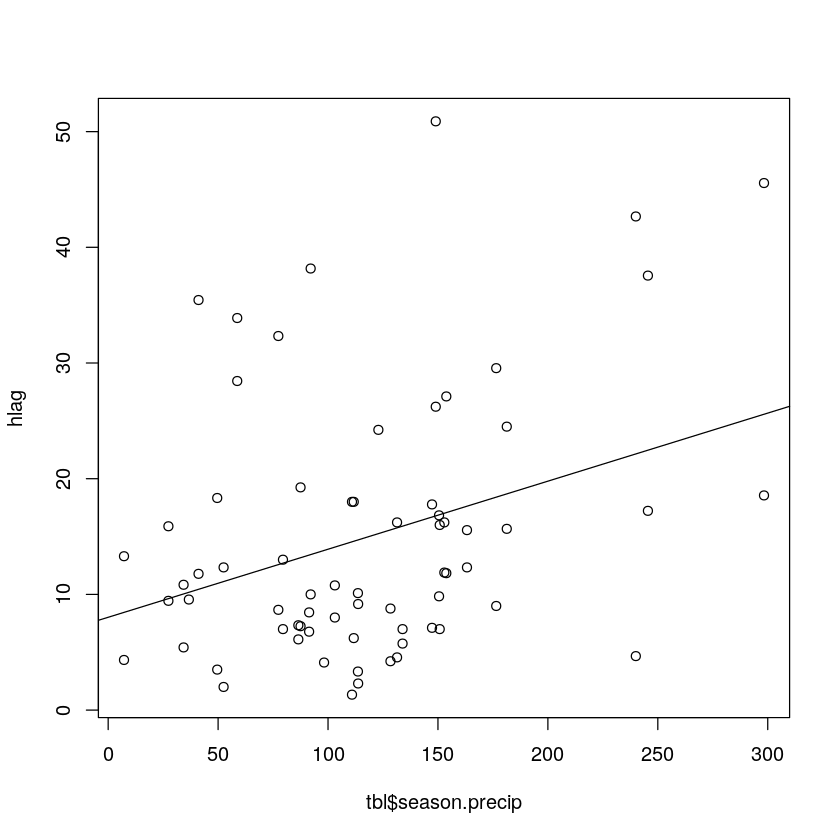

In [110]:
# Plot of the model
plot(hlag ~ tbl$season.precip, data=new)
abline(ph_lm1_lag)